# Objective

Compare cci1pp `grow_factor` parameter values:
- `cleanup_fg_grow_factor` = 0
- `cleanup_fg_grow_factor` = 0.01

# Params

Params are otherwise the same for all data in this notebook.

skimage.feature.match_template is used for normalized cross-correlation.

In [36]:
DOWNSAMPLE_FACTOR = 2
KERNEL_SIZE = 150
DISC_RADIUS = 3

pp_params = {
    "input_rescale_factor":   None,
    "input_gaussian_sigma":   None,
    "align_bg_pixel_thresh":  0.25,
    "align_bg_row_thresh":    0.35,
    "align_mask_margin":      0.01,
    "align_cutout_height":    0.75,
    "align_oversub_factor":   1.05,
    "cleanup_wall_margin":    0.05,
    "cleanup_bg_brt_thresh":  0.25,
    "cleanup_bg_grow_factor": 1.0e-2,
    "cleanup_fg_brt_thresh":  0.05,
#     "cleanup_fg_grow_factor": 0 vs. 1.0e-2,
    "cleanup_fg_grow_cycles": 4,
    "cleanup_fg_size_thresh": 3.0e-4,
    "cleanup_gaussian_sigma": None,
}

# Results

Using the minimum `cleanup_fg_grow_factor = 0` value helps mitigate undercounting for images with large aberrations, including bubbles, scratches, etc. However, overall the line for prediction count vs. ground truth count is still far from the ideal prediction count = ground truth count line. This indicates that while it's important to address local issues like masking, there are still undercounting issues that might be addressed using more global settings in `pp_params`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from matplotlib.lines import Line2D

In [6]:
df_gc = pd.read_csv('pred_gt_counts_gc.csv')
df_gc_mask_reduced = pd.read_csv('pred_gt_counts_gc_mask_reduced.csv')

In [7]:
df_gc.head()

,gt_xs,xs,pp_xs,run_name,lane_no,ts,valid_area_fraction
0,519,443,399,20201217,0,20201217-142717,0.780632
1,568,457,394,20201217,2,20201217-142717,0.717447
2,674,555,575,20201217,4,20201217-142717,0.997920
3,410,320,190,20201217,5,20201217-142717,0.351721
4,46,96,33,20201216,1,20201216-163816,0.484977


In [8]:
df_gc_mask_reduced.head()

,gt_xs,xs,pp_xs,run_name,lane_no,ts,valid_area_fraction
0,519,443,446,20201217,0,20201217-142717,0.848203
1,568,457,453,20201217,2,20201217-142717,0.825119
2,674,555,575,20201217,4,20201217-142717,0.997920
3,410,320,287,20201217,5,20201217-142717,0.505194
4,46,96,72,20201216,1,20201216-163816,0.613353


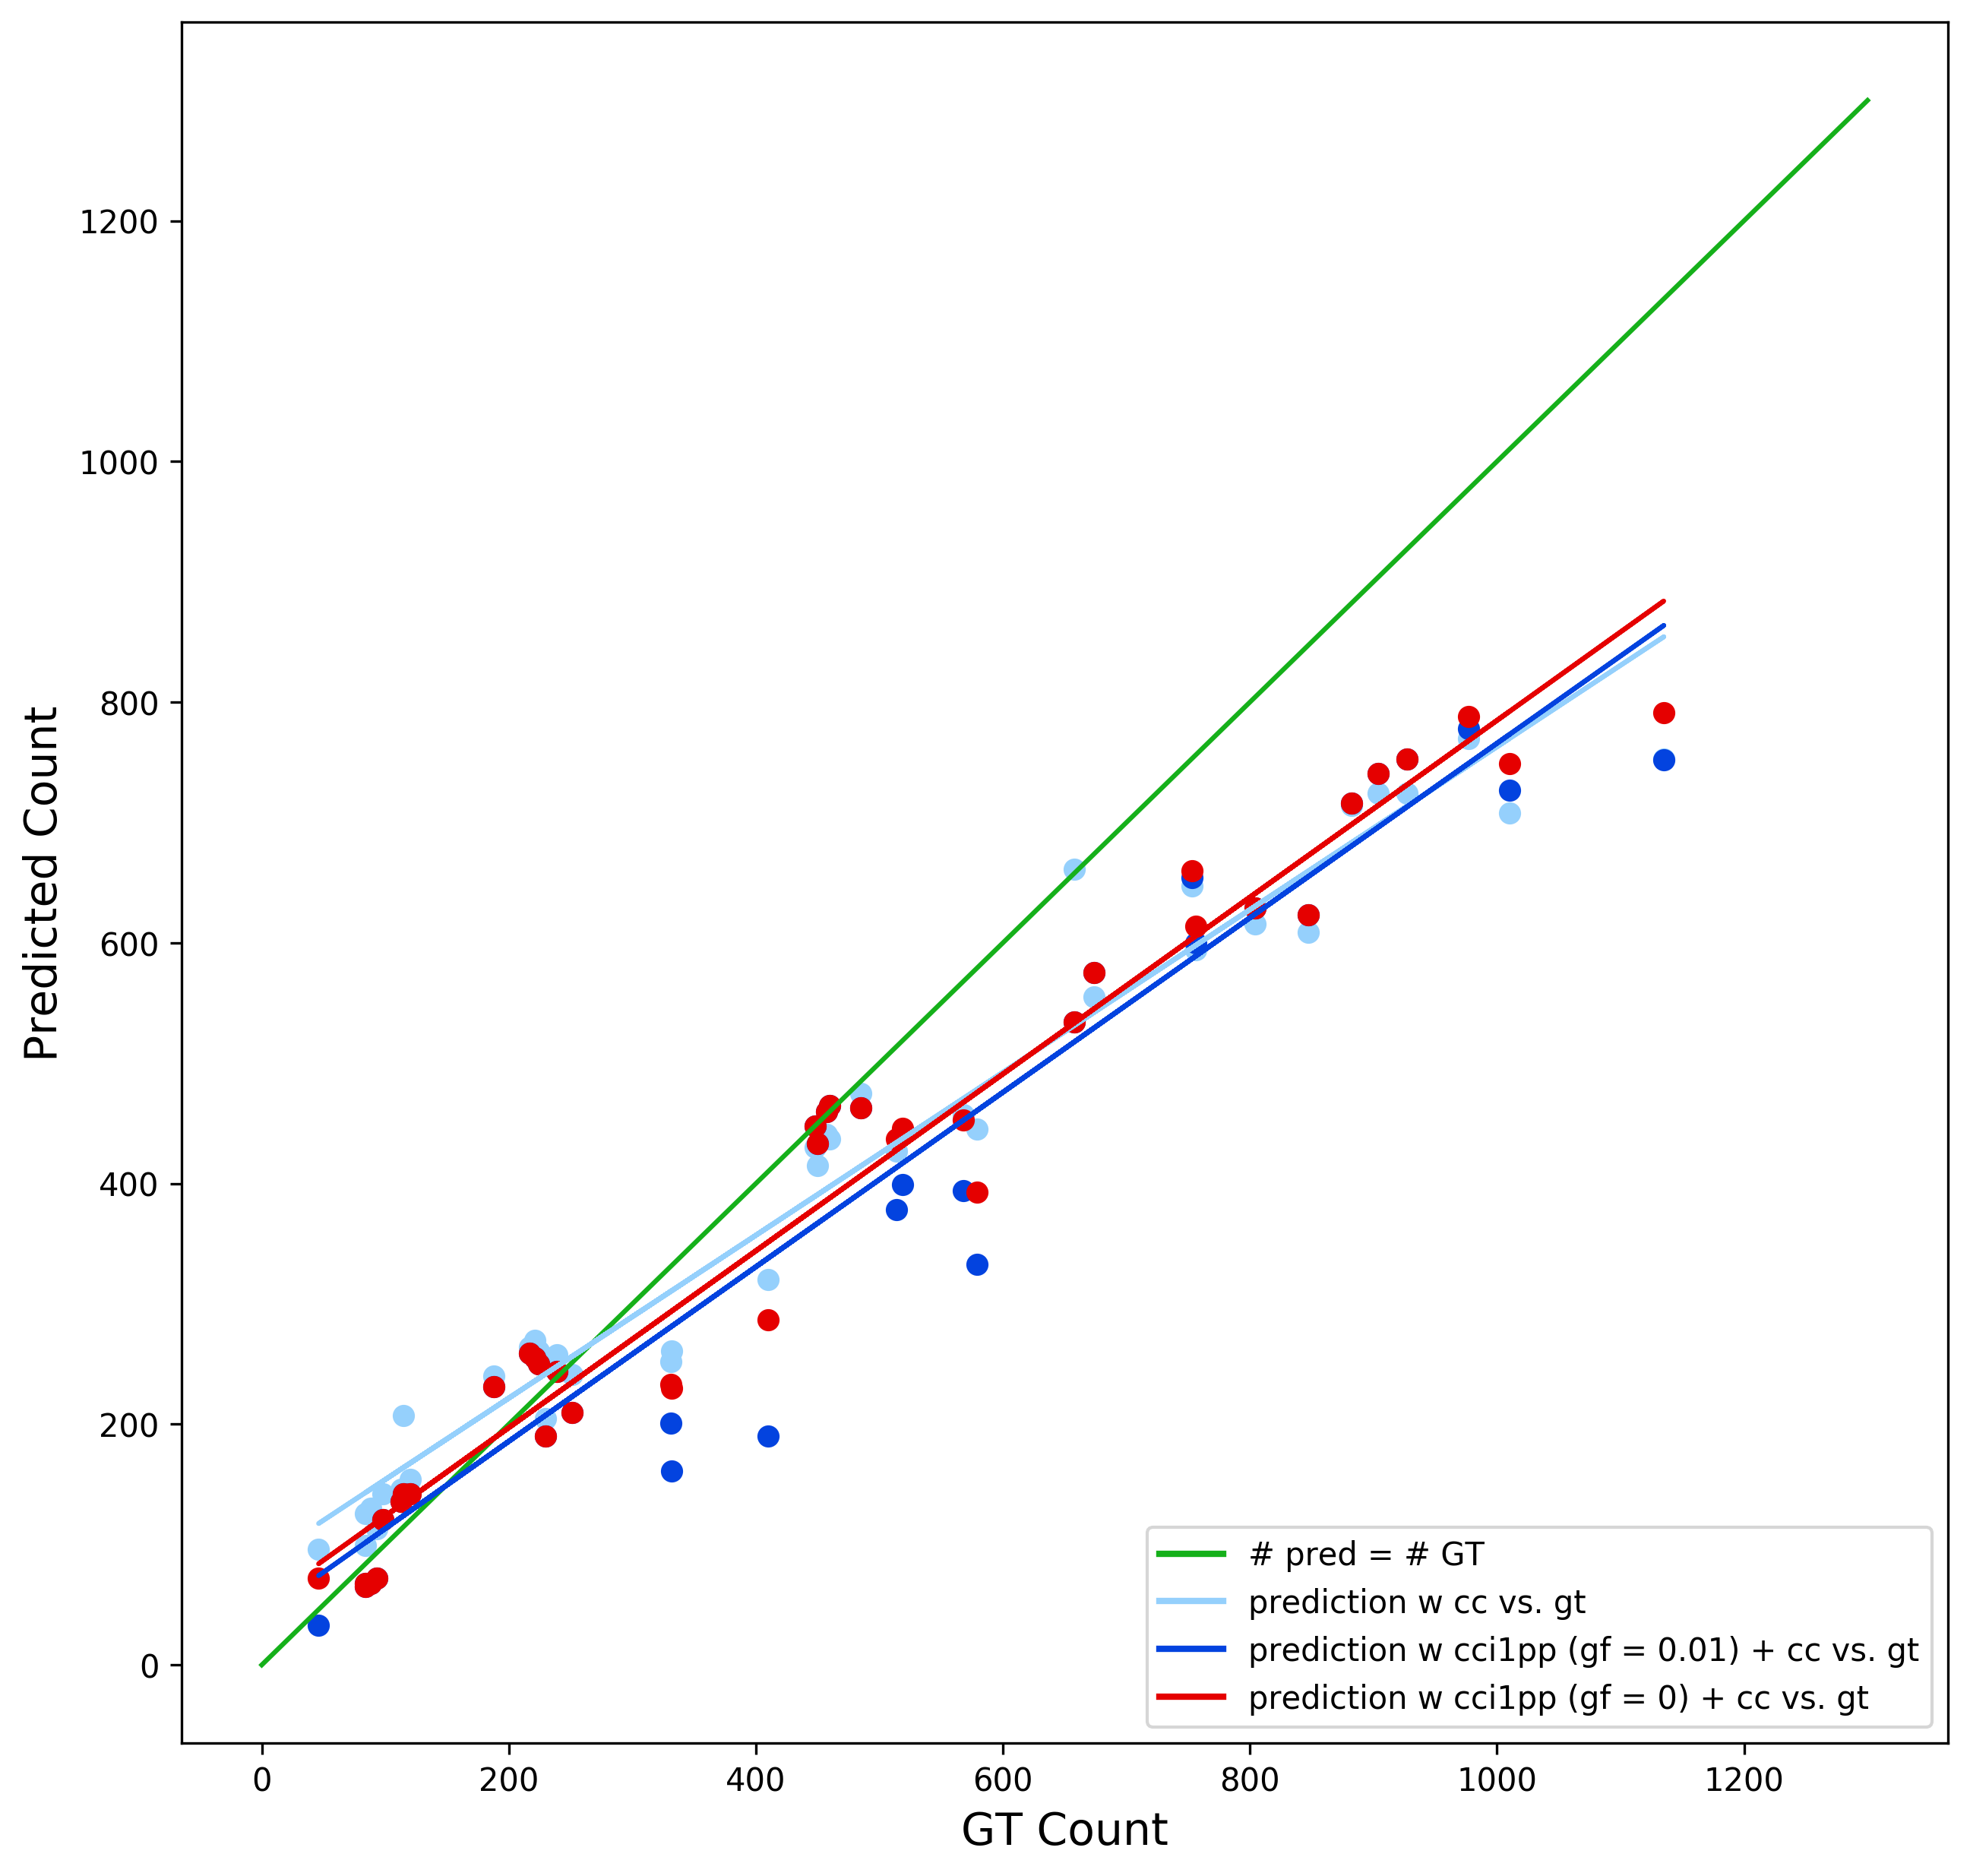

In [16]:
plt.figure(figsize=(10,10), dpi=300)
plt.plot([0, 1300], [0, 1300], color='xkcd:green')

plt.scatter(df_gc['gt_xs'], df_gc['xs'], facecolor='xkcd:light blue')
slope, intercept, r_value, p_value, std_err = linregress(df_gc['gt_xs'], df_gc['xs'])
plt.plot(df_gc['gt_xs'], intercept + [slope*x for x in df_gc['gt_xs']], color='xkcd:light blue')

plt.scatter(df_gc['gt_xs'], df_gc['pp_xs'], facecolor='xkcd:blue')
slope, intercept, r_value, p_value, std_err = linregress(df_gc['gt_xs'], df_gc['pp_xs'])
plt.plot(df_gc['gt_xs'], intercept + [slope*x for x in df_gc['gt_xs']], color='xkcd:blue')

plt.scatter(df_gc_mask_reduced['gt_xs'], df_gc_mask_reduced['pp_xs'], facecolor='xkcd:red')
slope, intercept, r_value, p_value, std_err = linregress(df_gc_mask_reduced['gt_xs'], df_gc_mask_reduced['pp_xs'])
plt.plot(df_gc_mask_reduced['gt_xs'], intercept + [slope*x for x in df_gc_mask_reduced['gt_xs']], color='xkcd:red')

handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:light blue', lw=2, label='prediction w cc vs. gt'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:blue', lw=2, label='prediction w cci1pp (gf = 0.01) + cc vs. gt'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='prediction w cci1pp (gf = 0) + cc vs. gt'))

plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.xlabel('GT Count', fontsize=14)
plt.ylabel('Predicted Count', fontsize=14)
plt.show()